# Preços de Medicamentos - Consumidor
### Nesse projeto irei criar uma API para o consumidor sobre os preços dos medicamentos no brasil.

<img src="https://i.imgur.com/W7DMmnl.jpeg" />

Os dados representam a lista de preços de Medicamentos , contemplando o preço Fábrica, ou preço **fabricante (PF)**, que é o preço máximo que pode ser praticado pelas empresas produtoras ou importadoras do produto e pelas empresas distribuidoras. O PF indica o preço máximo permitido para venda a farmácias e drogarias e o **Preço Máximo ao Consumidor (PMC)** indica o preço teto de venda ao consumidor.

Fonte dos dados: https://dados.anvisa.gov.br/dados

### Agência Nacional de Vigilância Sanitária - ANVISA

Criada pela Lei nº 9.782, de 26 de janeiro 1999, a Agência Nacional de Vigilância Sanitária (Anvisa) é uma autarquia sob regime especial, que tem sede e foro no Distrito Federal, e está presente em todo o território nacional por meio das coordenações de portos, aeroportos, fronteiras e recintos alfandegados.

Tem por finalidade institucional promover a proteção da saúde da população, por intermédio do controle sanitário da produção e consumo de produtos e serviços submetidos à vigilância sanitária, inclusive dos ambientes, dos processos, dos insumos e das tecnologias a eles relacionados, bem como o controle de portos, aeroportos, fronteiras e recintos alfandegados.

- Data da criação do banco de dados: 31 de maio de 2017
- Última atualização: 13 de outubro de 2020

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 999)

In [2]:
%time data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Projeto_api_preco_de_medicamento/TA_PRECO_MEDICAMENTO (1).csv', sep = ';', encoding  = 'LATIN-1')

Wall time: 682 ms


In [3]:
data

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 18% ALC,PF 20%,PMC 0%,PMC 12%,PMC 17%,PMC 17% ALC,"PMC 17,5%","PMC 17,5% ALC",PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2019,TARJA
0,ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,"5,38912E+14","1,7056E+12","7,89111E+12",-,-,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,Novo,Regulado,"19,74","22,11","25,55","27,32","23,78","27,51","23,93","27,71","27,71","28,51","29,66","34,13","36,42","32,87","36,66","33,08","36,92","33,28","37,95",Não,Não,Não,Não,NaN,Negativa,Sim,Tarja Vermelha
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,"5,05113E+14","1,018E+12","7,89602E+12",-,-,ORENCIA,125 MG/ML SOL INJ CT 1 SER PREENCHIDA,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,"1228,49","1228,49","1396,01","1480,11","1480,11","1489,08","1489,08","1498,16","1498,16","1535,61","1698,32","1929,9","2046,17","2046,17","2058,57","2058,57","2071,12","2071,12","2122,89",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,"5,05113E+14","1,018E+12","7,89602E+12",-,-,ORENCIA,125 MG/ML SOL INJ CT 4 SER PREENC VD TRANS + D...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,"4914,04","4914,04","5584,14","5920,53","5920,53","5956,41","5956,41","5992,73","5992,73","6142,55","6793,37","7719,75","8184,79","8184,79","8234,39","8234,39","8284,6","8284,6","8491,72",Não,Não,Sim,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
3,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,"5,05108E+14","1,018E+12","7,89602E+12",-,-,ORENCIA,250 MG PO LIOF INJ 1 CT 1 FA + SER DESCARTÁVEL,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,"1547,45","1547,45","1758,47","1864,4","1864,4","1875,7","1875,7","1887,13","1887,13","1934,31",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
4,ABCIXIMABE,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,"5,14517E+14","1,12363E+12","7,89621E+12",-,-,REOPRO,2 MG/ML SOL INJ CT FA VD INC X 5 ML,"B1C3 - INIBIDORES DA AGREGAÇÃO PLAQUETÁRIA, AN...",-,Regulado,"2003,06","2003,06","2276,21","2413,32","2413,32","2427,95","2427,95","2442,76","2442,76","2503,83",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25316,ZOPICLONA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,"5,7672E+14","1,8326E+12","7,89607E+12",-,-,IMOVANE,"7,5 MG COM REV CT BL AL PLAS TRANS X 20",N5B1 - HIPNÓTICOS E SEDATIVOS NÃO BARBITÚRICOS...,Novo,Regulado,"34,25","34,25","38,92","41,27","41,27","41,52","41,52","41,77","41,77","42,81","47,35","53,8","57,05","57,05","57,4","57,4","57,74","57,74","59,18",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha (*)
25317,ZUCLOPENTIXOL,04.522.600/0001-70,LUNDBECK BRASIL LTDA,"5,242E+14","1,0475E+12","5,70216E+12",-,-,CLOPIXOL,10 MG COM REV CT BL AL PLAS TRANS X 20,N5A9 - ANTIPSICÓTICOS CONVENCIONAIS,Similar,Regulado,"26,08","26,08","29,64","31,42","31,42","31,61","31,61","31,8","31,8","32,6","36,05","40,98","43,44","43,44","43,7","43,7","43,96","43,96","45,07",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
25318,ZUCLOPENTIXOL,04.522.600/0001-70,LUNDBECK BRASIL LTDA,"5,242E+14","1,0475E+12","5,70216E+12",-,-,CLOPIXOL,25 MG COM REV CT BL AL PLAS TRANS X 20,N5A9 - ANTIPSICÓTICOS CONVENCIONAIS,Similar,Regulado,"57,02","57,02","64,8","68,7","68,7","69,12","69,12","69,54","69,54","71,28","78,83","89,58","94,97","94,97","95,55","95,55","

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25321 entries, 0 to 25320
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SUBSTÂNCIA                                             25321 non-null  object 
 1   CNPJ                                                   25321 non-null  object 
 2   LABORATÓRIO                                            25321 non-null  object 
 3   CÓDIGO GGREM                                           25321 non-null  object 
 4   REGISTRO                                               25321 non-null  object 
 5   EAN 1                                                  25321 non-null  object 
 6   EAN 2                                                  25321 non-null  object 
 7   EAN 3                                                  25321 non-null  object 
 8   PRODUTO                                       

## Dicionário das variáveis 

**ANÁLISE RECURSAL** – Destina-se a prestar informações sobre produtos cuja análise de
preço ainda esteja em curso no âmbito da CMED, tanto em sede de pedido de reconsideração
como de recurso ao Comitê Técnico Executivo - CTE/CMED.

**APRESENTAÇÃO** – É a descrição de como o medicamento é apresentado, quanto a sua
forma farmacêutica, dosagem e quantidade.

**CAP** – O Coeficiente de Adequação de Preços é um desconto mínimo obrigatório,
atualizado anualmente, a ser aplicado sempre que forem realizadas vendas de medicamentos,
constantes do rol divulgado pela CMED e nas compras de todos os medicamentos por força de
decisão judicial, destinadas aos entes da administração pública direta e indireta da União, dos
Estados, do Distrito Federal e dos Municípios. Sobre ele, vamos falar mais à frente.

**CLASSE TERAPÊUTICA** – É a Classificação Anatômica de Produtos Farmacêuticos. Está
relacionado com a finalidade e o local de atuação do medicamento de acordo com a Associação
Europeia de Pesquisa de Mercado Farmacêutico (EphMRA).

**CNPJ** – Código de identificação da pessoa jurídica. 

**CÓDIGO GGREM** – É um campo específico de identificação de determinada
apresentação, cujo fornecimento e geração são exclusivos da CMED e são únicos para cada
apresentação.

**COMERCIALIZAÇÃO 2017** – Refere-se à informação se o produto foi ou não
comercializado pelo detentor do registro, no ano de 2017.

**CONFAZ 87** – Lista de medicamentos que ficam isentas do ICMS, cujas operações sejam
destinadas a órgãos da Administração Pública Direta e Indireta Federal, Estadual e Municipal e
do Distrito Federal e a suas fundações públicas.

**EAN 1** – O Código EAN é também conhecido como Código de Barras ou GTIN. É composto
por 13 dígitos e nele se identifica o País de origem do produto, a empresa fabricante, o produto
por ela produzido e um digito verificador.

**EAN 2** – O Código EAN é também conhecido como Código de Barras ou GTIN. É composto
por 13 dígitos e nele se identifica o País de origem do produto, a empresa fabricante, o produto
por ela produzido e um digito verificador.

**EAN 3** – O Código EAN é também conhecido como Código de Barras ou GTIN. É composto
por 13 dígitos e nele se identifica o País de origem do produto, a empresa fabricante, o produto
por ela produzido e um digito verificador.

**LABORATÓRIO** – É o nome da empresa detentora do registro sanitário podendo ser a
produtora ou importadora do medicamento.

**LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)** – Classificação fiscal dos
medicamentos em uma das listas a seguir, conforme o regime tributário previsto na Lei nº
10.147, de 2000:

- **Lista Positiva:** medicamentos cujas substâncias ativas constam do anexo do Decreto nº 3.803, de 24 de abril de 2001, e suas atualizações, sujeitos à prescrição médica, identificados com tarja vermelha ou preta, e cujas empresas produtoras usufruem do regime especial de utilização de crédito presumido de PIS/Pasep e COFINS, classificados em três categorias, ou seja, medicamentos isentos de PIS/Pasep e COFINS:
    - I.Categoria I - Medicamentos monodroga identificados com tarja vermelha ou preta; 
    - II.Categoria II - Medicamentos em associações identificados com tarja vermelha ou preta;
    - III.Categoria III - Substâncias para medicamentos utilizados em nutrição parenteral, hemodiálise e diálise peritoneal, substitutos do plasma e       expansores plasmáticos, identificados com tarja vermelha. 
- **Lista Negativa:** medicamentos pertencentes às classificações constantes do art. 1º daLei nº 10.147, de 2000, cujas substâncias ativas não estejam relacionadas no anexo do Decreto nº 3.803, de 2001, e suas atualizações, ou seja, medicamentos incidência de 12% de PIS/Pasep e COFINS.
- **Lista Neutra:** medicamentos que não estão sujeitos ao regime tributário estabelecidona Lei nº 10.147, de 2000, ou seja, medicamentos incidência de 9,25% de PIS/Pasep e COFINS.

**PF** - PF 0%, PF 12%, PF 17%, PF 17% ALC, PF 17,5%, PF 17,5% ALC, PF 18%, PF 18% ALC, PF
20%, PF Sem Impostos, Preço Fábrica – É o teto de preço pelo qual um laboratório ou
distribuidor de medicamentos pode comercializar no mercado brasileiro um medicamento.
Desta maneira, o PF vem a ser o preço máximo permitido para vendas de medicamentos
destinadas a farmácias, drogarias, além das destinadas a entes da Administração Pública.

**PMC** - PMC 0%, PMC 12%, PMC 17%, PMC 17% ALC, PMC 17,5%, PMC 17,5% ALC, PMC 18%,
PMC 18% ALC, PMC 20%, Preço Máximo ao Consumidor ou PMC – É o preço a ser praticado pelo
comércio varejista de medicamentos, ou seja, farmácias e drogarias, tendo em vista que este
contempla tanto a margem de lucro como os impostos inerentes a esses tipos de comércio.

*A Alíquota de 0% se refere ao preço sem ICMS, que deve ser aplicado aos medicamentos isentos
de ICMS, que são aqueles relacionados nos Convênios do CONFAZ, por exemplo CONVÊNIO ICMS
162/94 que isenta medicamentos destinados ao tratamento de câncer.*

*A Alíquota de ICMS 20% se refere atualmente apenas ao Estado do RJ.*

*A Alíquota de ICMS 18% se refere aos Estados de AM, AP, BA, CE, MA, MG, PB, PE, PI, PR, RN,
RS, SE, SP, TO.*

*A Alíquota de ICMS 17,5% se refere ao Estado de RO*

*A alíquota de ICMS 17% está relacionada aos demais Estados*

*A Alíquota de ICMS 12% está relacionada com os Medicamentos Genéricos de SP e MG.*

*As Alíquotas de 17%, 17,5% e 18% que tem ao lado a sigla ALC, significa Áreas de Livre Comércio,
e dizem respeito às seguintes cidades: Manaus/Tabatinga (AM), Boa Vista/Bonfim (RR),
Macapá/Santana (AP), Guajará-Mirim (RO), Brasiléia/Epitaciolândia/ Cruzeiro do Sul (AC).*

*Além das alíquotas citadas anteriormente também é publicado o PF Sem Impostos que são os
preços sem o ICMS e sem PIS/Pasep e COFINS.*

**PRINCÍPIO ATIVO** – É uma substância química ativa, fármaco, droga ou matéria-prima
que tenha propriedades farmacológicas com finalidade medicamentosa, utilizada para
diagnóstico, alívio ou tratamento, empregada para modificar ou explorar sistemas fisiológicos
ou estados patológicos, em benefício da pessoa na qual se administra. Portanto, princípio ativo
do medicamento é o nome principal de sua composição.

**PRODUTO** – É o nome comercial dado ao medicamento, em determinada apresentação,
de um referido laboratório, no caso dos medicamentos genéricos é igual ao Princípio Ativo.

**REGISTRO** – É o número de registro de produto junto à ANVISA.

**RESTRIÇÃO HOSPITALAR** – Indica os medicamentos em embalagens hospitalares e de
uso restrito a hospitais e clínicas e, portanto, não podem ser comercializados pelo Preço Máximo
ao Consumidor não tendo seus PMC publicados.

**TARJA** – Indica qual se a venda do medicamento necessita de recita, sendo classificado em: 

- **Tarja Vermelha:** Medicamentos que só podem ser dispensados mediante apresentação de receita.
- **Tarja Preta:** Medicamentos que devem ser dispensados apenas mediante receituário acompanhado de notificação de receita, devendo ficar uma cópia no estabelecimento que realizou a dispensação.
- **Venda livre:** Medicamentos que podem ser dispensados sem a apresentação de receita.

**TIPO DE PRODUTO (STATUS DO PRODUTO)** – Tipo é a categorização do medicamento
por tipo de produto em Biológicos, Biológico Novo, Similar, Genérico, Novo, Específico,
Radiofármaco.

Status do produto indica se ele é referência.

**ICMS 0%** – Indica se o medicamento tem ou não o imposto sobre Circulação de
Mercadorias e Prestação de Serviços (ICMS), onde o imposto de cada Estado deve ser
considerado, pois ele influencia na diferença dos preços dos medicamentos de um Estado para
o outro. Por exemplo, no Estado do Paraná o ICMS é de 18% (dezoito por cento), no Estado do
Rio de Janeiro é de 20% (vinte por cento) e no Estado do Goiás é de 17% (dezessete por cento).

In [5]:
data['COUNT'] = 1

## Análise Exploratória dos Dados (EDA)

**Iremos incia nossa análise apontando os resultados:**
- Laboratórios
- Qual Substância (Produto) é mais fabricada pelos laboratórios

### Laboratórios

In [6]:
graf_laboratorio = data.groupby('LABORATÓRIO',as_index=False).agg({'COUNT':'sum'})

In [8]:
graf_laboratorio_2 = graf_laboratorio.sort_values(by='COUNT', ascending=False)
graf_laboratorio_2

,LABORATÓRIO,COUNT
77,EMS S/A,1364
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,1089
215,PRATI DONADUZZI & CIA LTDA,853
229,SANOFI MEDLEY FARMACÊUTICA LTDA.,823
171,LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,759
...,...,...
188,MERZ FARMACÊUTICA COMERCIAL LTDA,1
85,FARMACIA E LABORATORIO HOMEOPATICO ALMEIDA PRA...,1
114,HEMAFARMA COM. E IND. FARM. LTDA,1
244,TOMMASI IMPORTAÇÃO E EXPORTAÇÃO LTDA,1


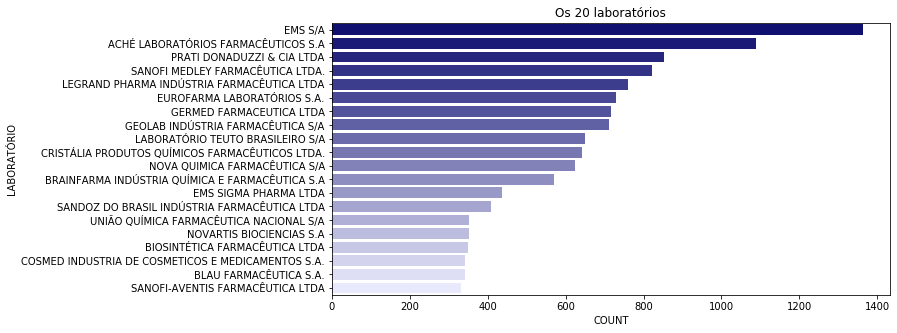

In [9]:
plt.figure(figsize=(10,5))
plt.title("Os 20 laboratórios")
sns.barplot(x="COUNT", y="LABORATÓRIO", data=graf_laboratorio_2.head(20),  palette=sns.light_palette ("navy", n_colors= 20, reverse=True));

**Temos EMS como o laboratório que mais manipula(fabrica) diferentes tipos de substâncias no país.**

### Substância

In [10]:
graf_substancia = data.groupby('SUBSTÂNCIA',as_index=False).agg({'COUNT':'sum'})

In [11]:
graf_substancia_2 = graf_substancia.sort_values(by='COUNT', ascending=False)
graf_substancia_2

,SUBSTÂNCIA,COUNT
765,COLECALCIFEROL,383
1653,OLANZAPINA,224
1700,PARACETAMOL,215
1670,OXALATO DE ESCITALOPRAM,201
1224,HEMIFUMARATO DE QUETIAPINA,188
...,...,...
1226,HEMIFUMARATO DE TENOFOVIR ALAFENAMIDA;ENTRICIT...,1
1227,HEMIFUMARATO DE TENOFOVIR ALAFENAMIDA;ENTRICIT...,1
1228,HEMINA,1
1236,HEPARINA SUÍNA;CUMARINA,1


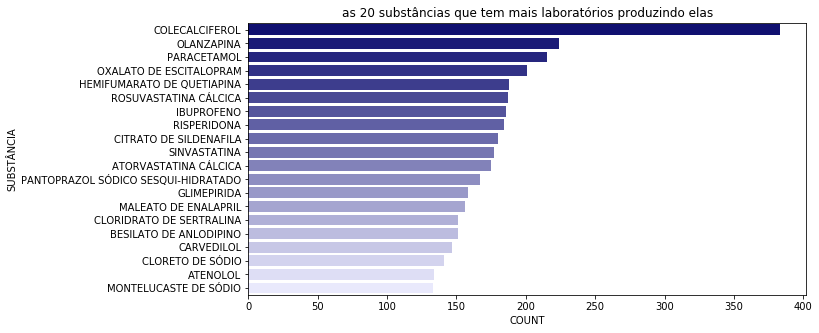

In [13]:
plt.figure(figsize=(10,5))
plt.title("as 20 substâncias que tem mais laboratórios produzindo elas")
sns.barplot(x="COUNT", y="SUBSTÂNCIA", data=graf_substancia_2.head(20),  palette=sns.light_palette ("navy", n_colors= 20, reverse=True));

**Temos aqui a COLECALCIFEROL, também denominado vitamina D3 como a substância com maior variedade de laboratórios a produzindo**

### Tarja

In [14]:
graf_tarja = data.groupby('TARJA',as_index=False).agg({'COUNT':'sum'})

In [15]:
graf_tarja_2 = graf_tarja.sort_values(by='COUNT', ascending=False)
graf_tarja_2

,TARJA,COUNT
5,Tarja Vermelha (*),11373
4,Tarja Vermelha,9119
6,Venda Livre,1528
0,Sem Informações de tarja (*),1519
7,Venda Livre/Sem Tarja (*),1151
3,Tarja Preta (*),304
2,Tarja Preta,278
1,Sem informações de tarja (*),49


**Dentro da variável tarja temos alguns valores com a presença de (*), fiz uma pesquisa sobre o que esse caracteres significa e não encontrei nada, pois no dicionário das variáveis não indica ou sita a presença do mesmo, logo optei por padronizar conforme dicionário.**

In [16]:
data['TARJA'] = data['TARJA'].apply(lambda x: x.replace('Tarja Vermelha (*)','Tarja Vermelha'))
data['TARJA'] = data['TARJA'].apply(lambda x: x.replace('Venda Livre/Sem Tarja (*)','Venda Livre'))
data['TARJA'] = data['TARJA'].apply(lambda x: x.replace('Tarja Preta (*)','Tarja Preta'))
data['TARJA'] = data['TARJA'].apply(lambda x: x.replace('Sem Informações de tarja (*)','Sem informações de tarja'))
data['TARJA'] = data['TARJA'].apply(lambda x: x.replace('Sem informações de tarja (*) ','Sem informações de tarja'))

In [17]:
graf_tarja_ajustado = data.groupby('TARJA',as_index=False).agg({'COUNT':'sum'})

In [19]:
graf_tarja_ajustado_2 = graf_tarja_ajustado.sort_values(by='COUNT', ascending=False)
graf_tarja_ajustado_2

,TARJA,COUNT
2,Tarja Vermelha,20492
3,Venda Livre,2679
0,Sem informações de tarja,1568
1,Tarja Preta,582


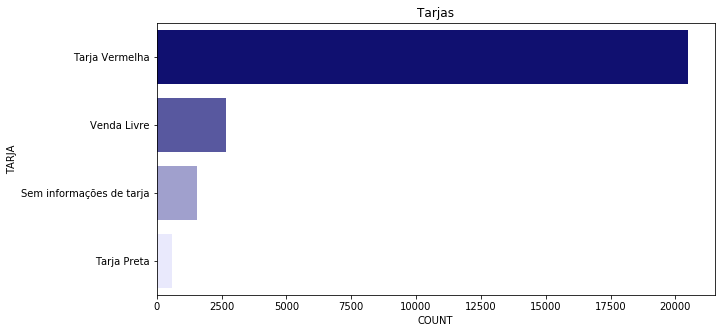

In [20]:
plt.figure(figsize=(10,5))
plt.title("Tarjas")
sns.barplot(x="COUNT", y="TARJA", data=graf_tarja_ajustado_2.head(4),  palette=sns.light_palette ("navy", n_colors= 4, reverse=True));

**A grande maioria das substâncias tem sua tarja como vermelha, isso significa que a grande maoria dos medicamentos só podem ser dispensados mediante apresentação de receita de um profissional da saúde.**

## TIPO DE PRODUTO (STATUS DO PRODUTO)

**Tipo é a categorização do medicamento por tipo de produto em Biológicos, Biológico Novo, Similar, Genérico, Novo, Específico, Radiofármaco.**

In [21]:
data['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

Genérico        8734
Similar         8294
Novo            4287
Específico      1951
Biológico       1021
    -            672
Fitoterápico     360
Radiofármaco       2
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

In [22]:
data['TIPO DE PRODUTO (STATUS DO PRODUTO)'] = data['TIPO DE PRODUTO (STATUS DO PRODUTO)'].apply(lambda x: x.replace('    -     ','Não informado'))

In [23]:
graf_status = data.groupby('TIPO DE PRODUTO (STATUS DO PRODUTO)',as_index=False).agg({'COUNT':'sum'})

In [24]:
graf_status_2 = graf_status.sort_values(by='COUNT', ascending=False)
graf_status_2

,TIPO DE PRODUTO (STATUS DO PRODUTO),COUNT
3,Genérico,8734
7,Similar,8294
4,Novo,4287
1,Específico,1951
0,Biológico,1021
5,Não informado,672
2,Fitoterápico,360
6,Radiofármaco,2


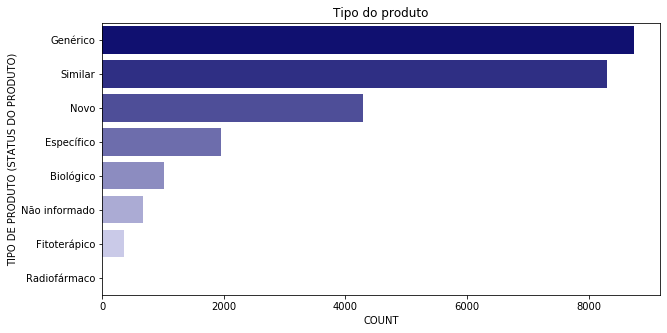

In [25]:
plt.figure(figsize=(10,5))
plt.title("Tipo do produto")
sns.barplot(x="COUNT", y="TIPO DE PRODUTO (STATUS DO PRODUTO)", data=graf_status_2.head(8),  palette=sns.light_palette ("navy", n_colors= 8, reverse=True));

**Fiz uma busca pelo status dos médicamentos junto a anvisa, o resultado obtido foi:**
- **Referência (Novo)**
    - Medicamento inovador que possui marca registrada, com qualidade, eficácia terapêutica e segurança comprovadas através de testes científicos.         Registrado pela Anvisa. 
    - Ele servirá de parâmetro para registros de posteriores medicamentos similares e genéricos, quando sua patente* expirar.
- **Similar**
    - São produzidos após vencer a patente dos medicamentos de referência e são identificados por um nome de marca. 
    - Possuem eficácia, segurança e qualidade comprovadas através de testes científicos e são registrados pela Anvisa.
    - Possuem o mesmo fármaco e indicação terapêutica do medicamento de referência, podendo diferir em características relativas ao tamanho e forma         do produto, prazo de validade, embalagem, rotulagem, excipientes e veículos.
    - Não podem ser substituídos pelo medicamento de referência nem pelo medicamento genérico.
- **Genérico**
    - É igual ao medicamento de referência e possui qualidade, eficácia terapêutica e segurança comprovadas através de testes científicos. Registrado       pela Anvisa.
    - Não possui nome de marca, somente a denominação química de acordo com a Denominação Comum Brasileira (DCB).
    - Pode ser substituído pelo medicamento de referência pelo profissional farmacêutico ou vice-versa.
- **Específicos**
    - Medicamentos específicos são produtos farmacêuticos com finalidade profilática, curativa ou paliativa que não podem ser enquadrados nas         
      categorias de medicamento novo, genérico, similar, biológico, fitoterápico ou notificado. O princípio ativo destes medicamentos, independente  
      da natureza ou origem, não é passível de ensaio de bioequivalência frente a um produto comparador.
    - Na categoria medicamentos específicos são enquadrados, por exemplo, os produtos para prevenção da desidratação e os medicamentos à base de  
      vitaminas, minerais e aminoácidos que são isentos de prescrição médica.
- **Biológicos**
    - São medicamentos produzidos por biossíntese em células vivas, ao contrário dos sintéticos que são produzidos por síntese química. Assim, a     
      química orgânica dá lugar à biologia molecular e aos processos biotecnológicos. Sob o ponto de vista industrial, a maioria dos 
      produtos farmacêuticos biológicos é produzida em cultura de células geneticamente modificadas. Os biológicos representam atualmente a maior 
      fonte de inovação da indústria farmacêutica e soluções para inúmeras doenças, até então não tratadas eficazmente com as terapias tradicionais.
- **Fitoterápicos**
    - São considerados medicamentos fitoterápicos os obtidos com emprego exclusivo de matérias-primas ativas vegetais. Não se considera medicamento  
      fitoterápico aquele que inclui na sua composição substâncias ativas isoladas, sintéticas ou naturais, nem as associações dessas com extratos 
      vegetais.
- **Radiofármicos**
    - Os radiofármacos são preparações farmacêuticas com finalidade diagnóstica ou terapêutica que, quando prontas para o uso, contêm um ou mais  
      radionuclídeos. Compreendem também os componentes não radioativos para marcação e os radionuclídeos, incluindo os componentes extraídos dos 
      geradores de radionuclídeos

## ICMS 0%

 **Indica se o medicamento tem ou não o imposto sobre Circulação de Mercadorias e Prestação de Serviços (ICMS), onde o imposto de cada Estado deve ser considerado, pois ele influencia na diferença dos preços dos medicamentos de um Estado para
o outro. Por exemplo, no Estado do Paraná o ICMS é de 18% (dezoito por cento), no Estado do Rio de Janeiro é de 20% (vinte por cento) e no Estado do Goiás é de 17% (dezessete por cento).**

In [26]:
data['ICMS 0%'].value_counts()

Não    24528
Sim      793
Name: ICMS 0%, dtype: int64

In [27]:
graf_icms = data.groupby('ICMS 0%',as_index=False).agg({'COUNT':'sum'})

In [28]:
graf_icms_2 = graf_icms.sort_values(by='COUNT', ascending=False)
graf_icms_2

,ICMS 0%,COUNT
0,Não,24528
1,Sim,793


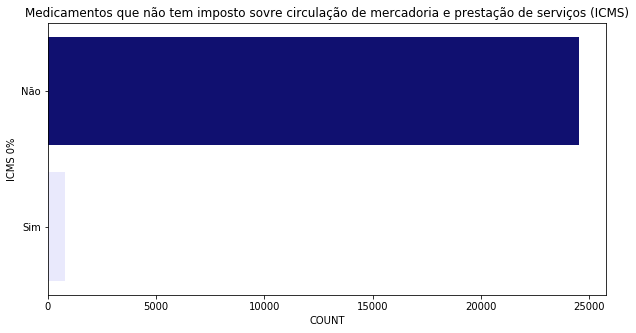

In [29]:
plt.figure(figsize=(10,5))
plt.title("Medicamentos que não tem imposto sovre circulação de mercadoria e prestação de serviços (ICMS)")
sns.barplot(x="COUNT", y="ICMS 0%", data=graf_icms_2.head(8),  palette=sns.light_palette ("navy", n_colors= 2, reverse=True));

**Note que são muito poucos os medicamentos que são insentos do ICMS.**

**Quais são esses medicamentos ?**

In [30]:
insentos_icms = data[data['ICMS 0%'] == 'Sim']

In [31]:
graf_substancia = insentos_icms.groupby('PRODUTO',as_index=False).agg({'COUNT':'sum'})

In [32]:
graf_substancia_2 = graf_substancia.sort_values(by='COUNT', ascending=False)
graf_substancia_2

,PRODUTO,COUNT
56,DIANEAL PD-2,28
58,DICLORIDRATO DE PRAMIPEXOL,27
218,SINVASTATINA,24
201,OLANZAPINA,24
69,ESPIRONOLACTONA,22
...,...,...
132,FURP-LAMIVUDINA + ZIDOVUDINA,1
1,ACLASTA,1
146,HIDROCLOROTIAZIDA,1
149,INTERFERON ALFA 2A HUMANO RECOMBINANTE,1


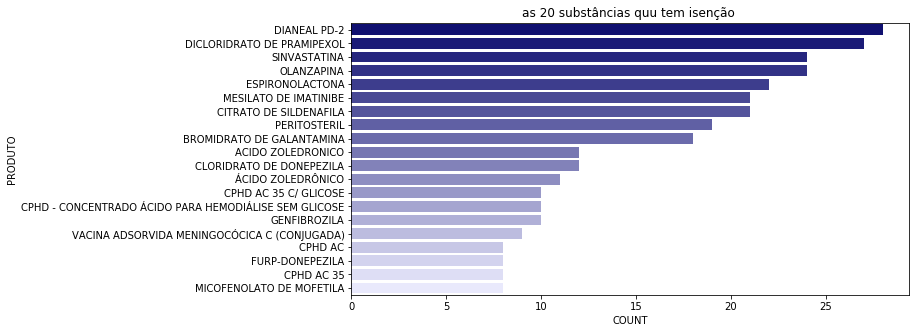

In [33]:
plt.figure(figsize=(10,5))
plt.title("as 20 substâncias quu tem isenção ")
sns.barplot(x="COUNT", y="PRODUTO", data=graf_substancia_2.head(20),  palette=sns.light_palette ("navy", n_colors= 20, reverse=True));

**Esses são os medicamentos que são insentos de ICMS, como o DIANEAL PD-2 que é usando nos pacientes portadores de insuficiência renal crônica, temos também o DICLORIDRATO DE PRAMIPEXOL que é indicado para o tratamento dos sinais e sintomas da doença de Parkinson idiopática.**